In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(image_path):
    return cv2.imread(image_path)

def convert_to_gray(image):
    if len(image.shape) > 2:
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

def scale_image(image, ratio):
    h, w = image.shape[:2]
    new_image = cv2.resize(image, (int(w*ratio), int(h*ratio)), 
                           interpolation=cv2.INTER_AREA if ratio < 1 else cv2.INTER_LINEAR)
    return new_image

def compare_size(image1, image2):
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]
    if h1 <= h2 and w1 <= w2:
        return 0
    elif h1 > h2 and w1 > w2:
        return 1
    else:
        return 2
    


In [3]:
def detections(original_image, image, template):
    
    detected_image = np.copy(original_image)
    
    best_detection = None
    score = 0

    for r in np.linspace(0.5,2,31):
        new_template = scale_image(template, r)
        
        cs2i = compare_size(new_template, image)
        if cs2i == 0:
            corr = cv2.matchTemplate(image, new_template, cv2.TM_CCOEFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(corr)

            h, w = new_template.shape[:2]
            top_left_loc = max_loc
            bottom_right_loc = (top_left_loc[0] + w, top_left_loc[1] + h)

            if max_val > score:
                best_detection = (top_left_loc, bottom_right_loc)
                score = max_val

    top_left_loc, bottom_right_loc = best_detection
    cv2.rectangle(detected_image, top_left_loc, bottom_right_loc, (0, 255, 0), 4)
        
    detected_image = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)
    return detected_image

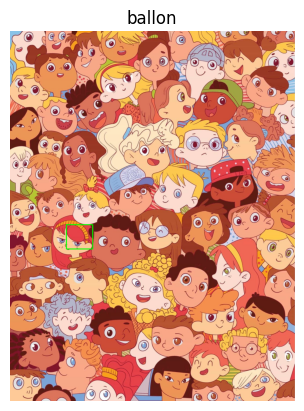

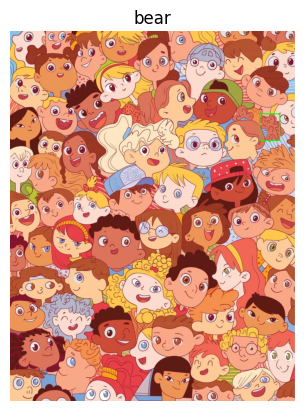

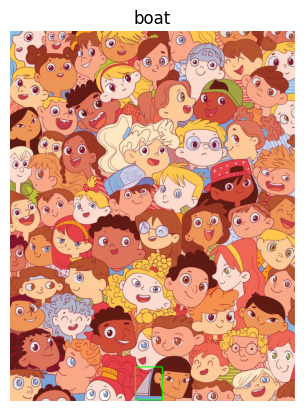

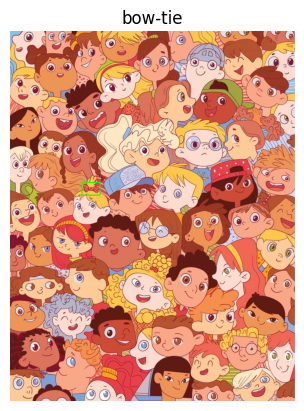

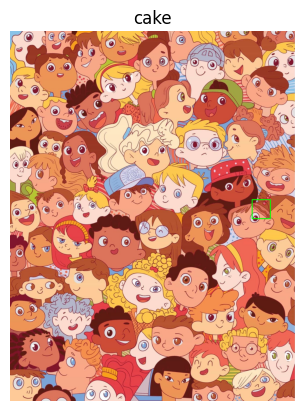

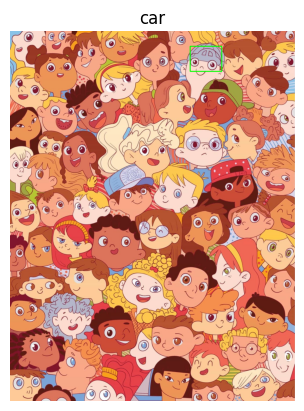

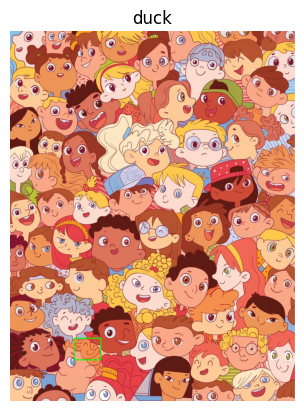

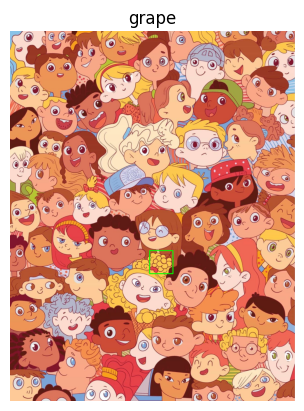

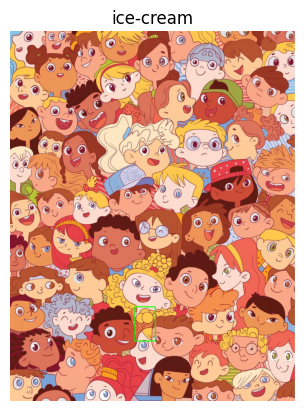

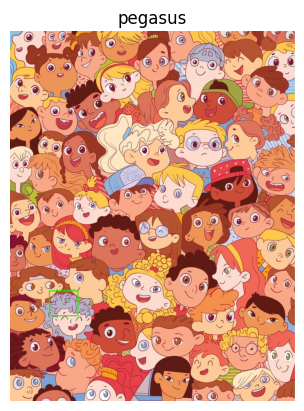

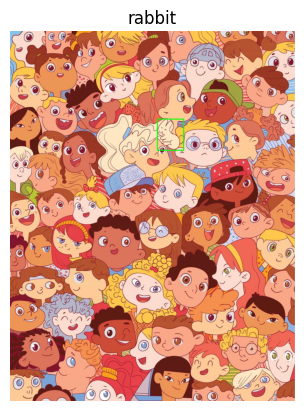

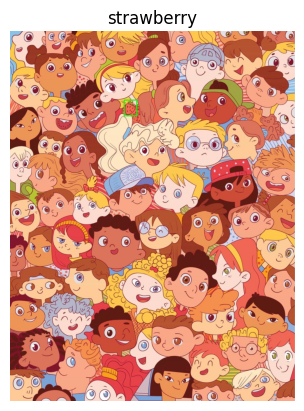

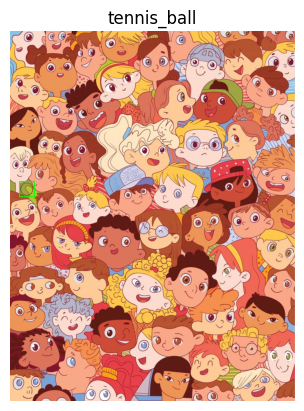

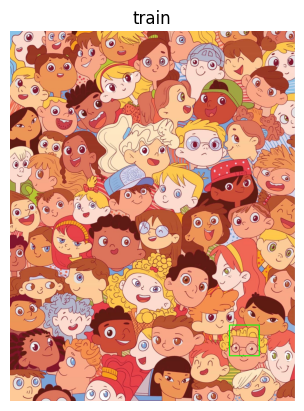

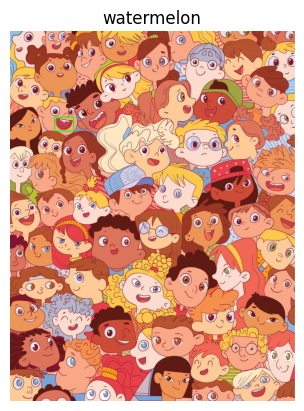

In [5]:
templates = ['ballon', 'bear', 'boat', 'bow-tie', 'cake', 'car', 'duck', 'grape', 
             'ice-cream', 'pegasus', 'rabbit', 'strawberry', 'tennis_ball', 'train', 'watermelon']

for i, template_name in enumerate(templates):
    image = read_image('image1/image1.jpg')
    template = read_image(f'image1/templates/{template_name}.jpg')

    image_gray = convert_to_gray(image)
    template_gray = convert_to_gray(template)
    edge_image = cv2.Canny(image_gray, 50, 150)
    edge_template = cv2.Canny(template_gray, 50, 150)

    detec = detections(image, edge_image, edge_template)
    
    plt.figure()
    plt.axis('off')
    plt.imshow(detec)
    plt.title(template_name)

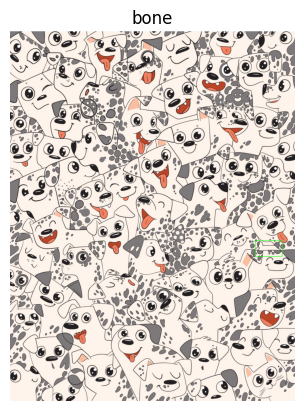

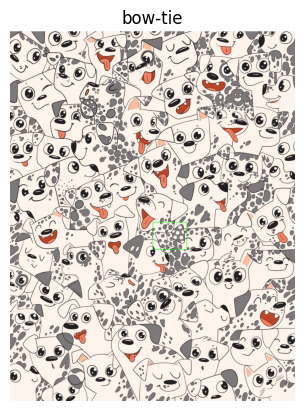

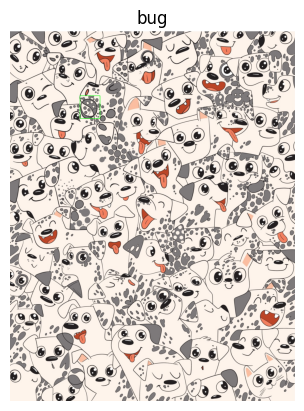

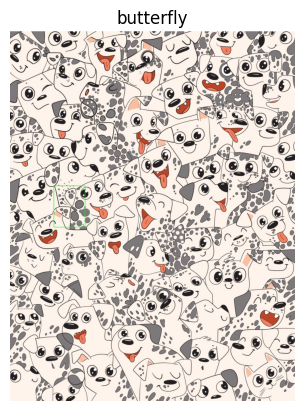

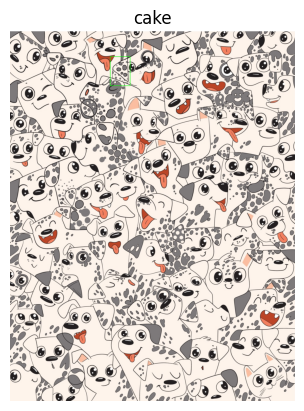

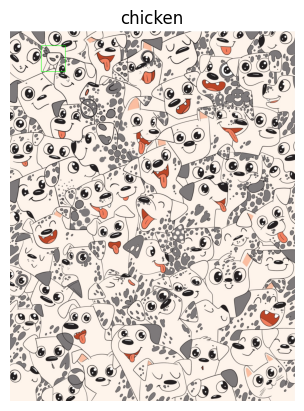

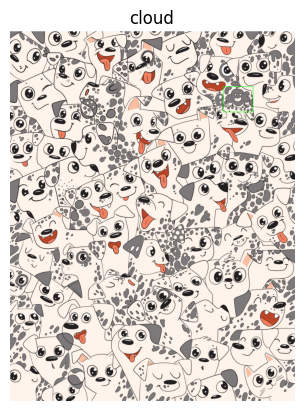

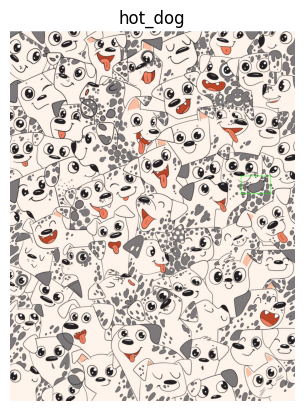

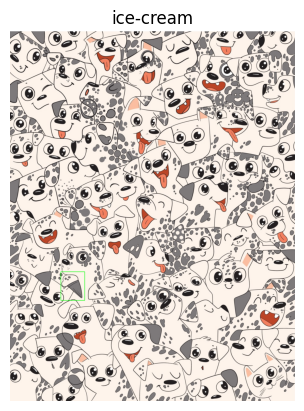

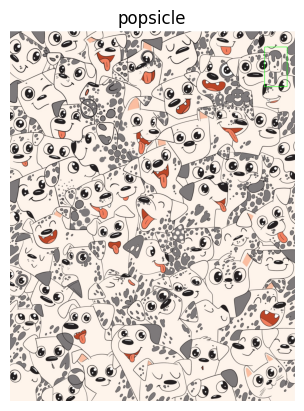

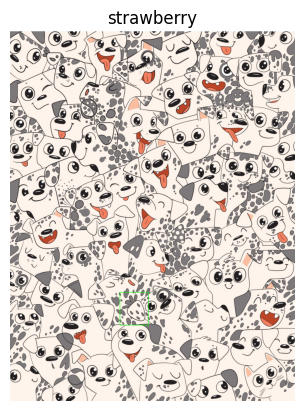

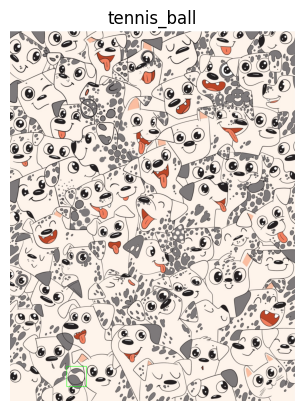

In [8]:
templates = ['bone', 'bow-tie', 'bug', 'butterfly', 'cake', 'chicken', 'cloud', 
             'hot_dog', 'ice-cream', 'popsicle', 'strawberry', 'tennis_ball']

for i, template_name in enumerate(templates):
    image = read_image('image2/image2.jpg')
    template = read_image(f'image2/templates/{template_name}.jpg')

    image_gray = convert_to_gray(image)
    template_gray = convert_to_gray(template)
    edge_image = cv2.Canny(image_gray, 50, 150)
    edge_template = cv2.Canny(template_gray, 50, 150)

    detect = detections(image, edge_image, edge_template)
    
    plt.figure()
    plt.axis('off')
    plt.imshow(detect)
    plt.title(template_name)